In [52]:
import json
import pandas as pd
import re

In [53]:
# load text of tweets
twitter = []
with open('Twitter1.json') as json_file:
    data = json.load(json_file)
    for tweet in data:
        twitter.append(tweet['text'])
twitter = pd.DataFrame({"text": twitter})
twitter.head()

,text
0,RT @repdarrellissa: Nobody is buying this Whit...
1,RT @KATATHEGREAT: Jiu Jitsu guys when someone ...
2,RT @SamRamani2: BREAKING: House Speaker Nancy ...
3,RT @ahistoryinart: 'The Deer in Petworth Park....
4,RT @SamRamani2: BREAKING: House Speaker Nancy ...


In [54]:
# preprocess tweets
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION)
def preprocess(tweet):
    tweet = p.clean(tweet)
    return tweet
twitter['tidy_text'] = [preprocess(t) for t in twitter['text']]
twitter.head()

,text,tidy_text
0,RT @repdarrellissa: Nobody is buying this Whit...,RT : Nobody is buying this White House isn’t b...
1,RT @KATATHEGREAT: Jiu Jitsu guys when someone ...,RT : Jiu Jitsu guys when someone breaks into t...
2,RT @SamRamani2: BREAKING: House Speaker Nancy ...,RT : BREAKING: House Speaker Nancy Pelosi expr...
3,RT @ahistoryinart: 'The Deer in Petworth Park....,RT : 'The Deer in Petworth Park.' (1827) We do...
4,RT @SamRamani2: BREAKING: House Speaker Nancy ...,RT : BREAKING: House Speaker Nancy Pelosi expr...


In [55]:
# sentiment analysis with NLTK-VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
twitter['polarity_score_vader'] = [(sia.polarity_scores(t)['neg'], sia.polarity_scores(t)['pos']) for t in twitter['tidy_text']]

# sentiment analysis with TextBlob
from textblob import TextBlob
twitter['polarity_score_textblob'] = [TextBlob(t).sentiment.polarity for t in twitter['tidy_text']]

# define polarity
def attidude(score, method):
    if method == 'vader':
        if score[0] < score[1]:
            return 'positive'
        elif score[0] > score[1]:
            return 'negative'
        else:
            return 'neutral'

    elif method == 'textblob':
        if score > 0:
            return 'positive'
        elif score < 0:
            return 'negative'
        else:
            return 'neutral'

twitter['label_vader'] = [attidude(s, 'vader') for s in twitter['polarity_score_vader']]
twitter['label_textblob'] = [attidude(s, 'textblob') for s in twitter['polarity_score_textblob']]
twitter.head()

,text,tidy_text,polarity_score_vader,polarity_score_textblob,label_vader,label_textblob
0,RT @repdarrellissa: Nobody is buying this Whit...,RT : Nobody is buying this White House isn’t b...,"(0.26, 0.136)",-0.20,negative,negative
1,RT @KATATHEGREAT: Jiu Jitsu guys when someone ...,RT : Jiu Jitsu guys when someone breaks into t...,"(0.0, 0.0)",0.00,neutral,neutral
2,RT @SamRamani2: BREAKING: House Speaker Nancy ...,RT : BREAKING: House Speaker Nancy Pelosi expr...,"(0.197, 0.116)",0.00,negative,neutral
3,RT @ahistoryinart: 'The Deer in Petworth Park....,RT : 'The Deer in Petworth Park.' (1827) We do...,"(0.0, 0.0)",0.25,neutral,positive
4,RT @SamRamani2: BREAKING: House Speaker Nancy ...,RT : BREAKING: House Speaker Nancy Pelosi expr...,"(0.197, 0.116)",0.00,negative,neutral


In [56]:
print("% of samples where the two methods agree: {}".format(sum(twitter['label_vader'] == twitter['label_textblob'])/twitter.shape[0]))

% of samples where the two methods agree: 0.5706467661691542


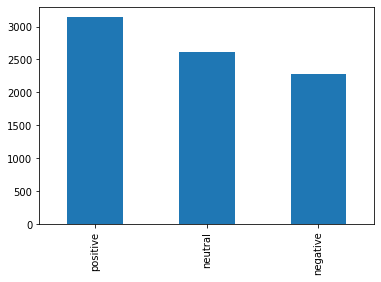

In [57]:
twitter['label_vader'].value_counts().plot(kind='bar');

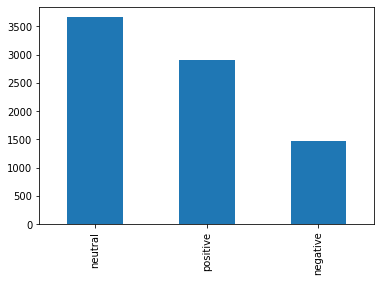

In [58]:
twitter['label_textblob'].value_counts().plot(kind='bar');